# Import Libraries

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Log
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
NBA=pd.read_csv(r"C:\Users\Mano\Desktop\capstone\NBAPlayerStats.csv",encoding= 'unicode_escape',delimiter=";")

In [4]:
NBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      590 non-null    int64  
 1   Player  590 non-null    object 
 2   Pos     590 non-null    object 
 3   Age     590 non-null    int64  
 4   Tm      590 non-null    object 
 5   G       590 non-null    int64  
 6   GS      590 non-null    int64  
 7   MP      590 non-null    float64
 8   FG      590 non-null    float64
 9   FGA     590 non-null    float64
 10  FG%     590 non-null    float64
 11  3P      590 non-null    float64
 12  3PA     590 non-null    float64
 13  3P%     590 non-null    float64
 14  2P      590 non-null    float64
 15  2PA     590 non-null    float64
 16  2P%     590 non-null    float64
 17  eFG%    590 non-null    float64
 18  FT      590 non-null    float64
 19  FTA     590 non-null    float64
 20  FT%     590 non-null    float64
 21  ORB     590 non-null    float64
 22  DR

In [5]:
NBA.shape

(590, 30)

In [6]:
NBA.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,...,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9
1,2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,...,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7
2,3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,...,0.767,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7
3,4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,...,0.579,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4
4,5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,...,0.862,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8


In [7]:
NBA.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,...,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,295.500000,25.761017,24.527119,11.620339,18.335593,2.906610,6.516441,0.423781,0.879153,2.604068,...,0.641332,0.813220,2.577458,3.390847,1.738814,0.588983,0.369322,0.983220,1.544068,7.865593
std,170.462606,4.162102,15.012562,15.217214,10.135615,2.303774,4.920442,0.163015,0.872085,2.308856,...,0.298489,0.755778,1.891797,2.453787,1.817469,0.442171,0.407891,0.853321,0.844149,6.332251
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.250000,23.000000,9.000000,0.000000,9.700000,1.100000,2.900000,0.375250,0.100000,0.700000,...,0.580000,0.300000,1.225000,1.600000,0.500000,0.300000,0.100000,0.400000,1.000000,3.000000
50%,295.500000,25.000000,28.000000,3.000000,17.750000,2.400000,5.200000,0.436000,0.700000,2.100000,...,0.743000,0.600000,2.300000,3.000000,1.100000,0.500000,0.300000,0.800000,1.600000,6.500000
75%,442.750000,28.000000,38.000000,21.000000,27.175000,4.100000,9.275000,0.495750,1.400000,4.100000,...,0.833000,1.100000,3.400000,4.500000,2.300000,0.900000,0.500000,1.300000,2.200000,11.375000
max,590.000000,41.000000,47.000000,47.000000,38.100000,10.800000,21.400000,1.000000,4.900000,12.800000,...,1.000000,4.300000,11.400000,15.000000,10.000000,2.300000,3.000000,4.800000,4.000000,29.300000


In [8]:
NBA.corr()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,1.000000,-0.080140,-0.075199,-0.102676,-0.071966,-0.079692,-0.078350,0.016425,-0.057674,-0.055894,...,-0.009360,-0.056654,-0.098460,-0.093504,-0.020786,-0.025252,-0.032153,-0.039935,-0.021811,-0.078807
Age,-0.080140,1.000000,0.128341,0.131980,0.221233,0.165827,0.154383,0.092885,0.182497,0.158738,...,0.076951,0.075111,0.178283,0.160124,0.219252,0.137869,0.075079,0.124258,0.183054,0.170514
G,-0.075199,0.128341,1.000000,0.646799,0.700717,0.609406,0.590730,0.299430,0.526833,0.513162,...,0.572166,0.344774,0.583632,0.555351,0.468529,0.500614,0.359367,0.507000,0.525393,0.609236
GS,-0.102676,0.131980,0.646799,1.000000,0.806669,0.773122,0.750591,0.215088,0.563201,0.562943,...,0.333448,0.403892,0.710669,0.672562,0.633369,0.575510,0.442553,0.691862,0.584634,0.769355
MP,-0.071966,0.221233,0.700717,0.806669,1.000000,0.889476,0.893356,0.272768,0.731145,0.735600,...,0.531351,0.390785,0.773521,0.716577,0.730348,0.717759,0.454196,0.756354,0.752311,0.890541
FG,-0.079692,0.165827,0.609406,0.773122,0.889476,1.000000,0.971504,0.325402,0.693463,0.697697,...,0.455151,0.376613,0.762972,0.704390,0.736487,0.624447,0.420379,0.821922,0.642726,0.991264
FGA,-0.078350,0.154383,0.590730,0.750591,0.893356,0.971504,1.000000,0.182327,0.775834,0.804997,...,0.463102,0.265908,0.701693,0.622779,0.766635,0.639769,0.338939,0.830715,0.613887,0.977566
FG%,0.016425,0.092885,0.299430,0.215088,0.272768,0.325402,0.182327,1.000000,0.052145,-0.020798,...,0.242218,0.349670,0.328593,0.361783,0.096874,0.166240,0.330333,0.177221,0.327895,0.286218
3P,-0.057674,0.182497,0.526833,0.563201,0.731145,0.693463,0.775834,0.052145,1.000000,0.972948,...,0.447942,-0.073561,0.395130,0.282018,0.556160,0.504104,0.100673,0.561728,0.406089,0.738639
3PA,-0.055894,0.158738,0.513162,0.562943,0.735600,0.697697,0.804997,-0.020798,0.972948,1.000000,...,0.440897,-0.091839,0.401520,0.281129,0.589794,0.522881,0.095987,0.598340,0.406059,0.743225


In [9]:
NBA.describe(include=object)

,Player,Pos,Tm
count,590,590,590
unique,590,5,30
top,Precious Achiuwa,SG,WAS
freq,1,145,25


# visualization

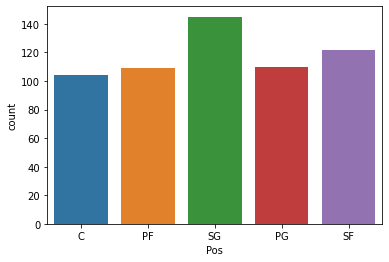

In [10]:
sns.countplot(NBA['Pos'],label="Count")
plt.show()

<AxesSubplot:>

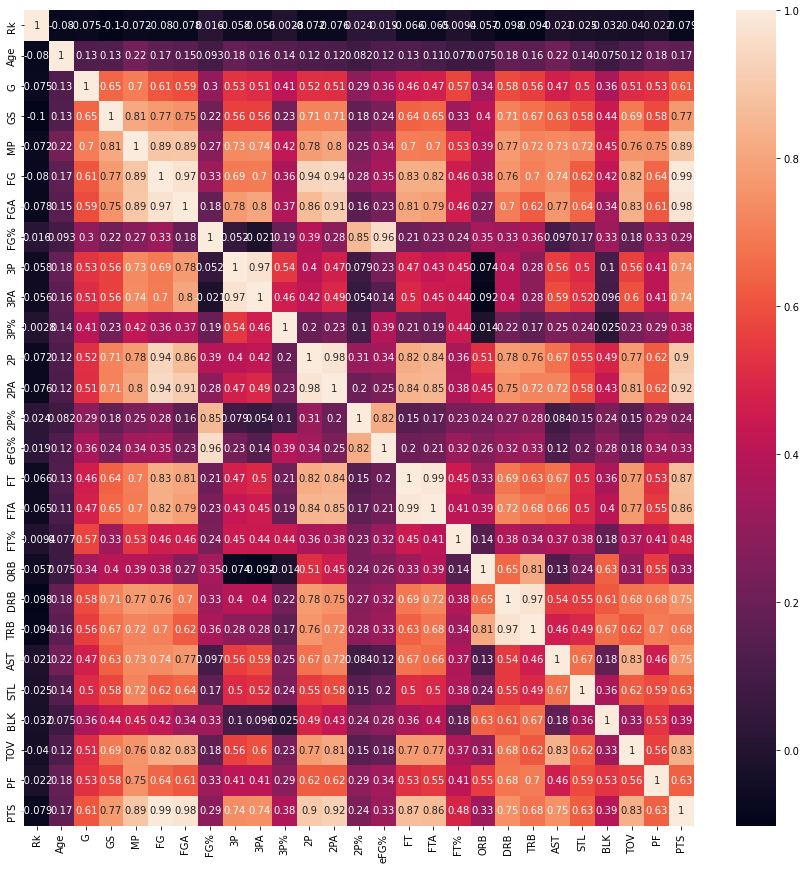

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(NBA.corr(),annot=True)

Text(0.5, 1.0, 'Age vs Points per game')

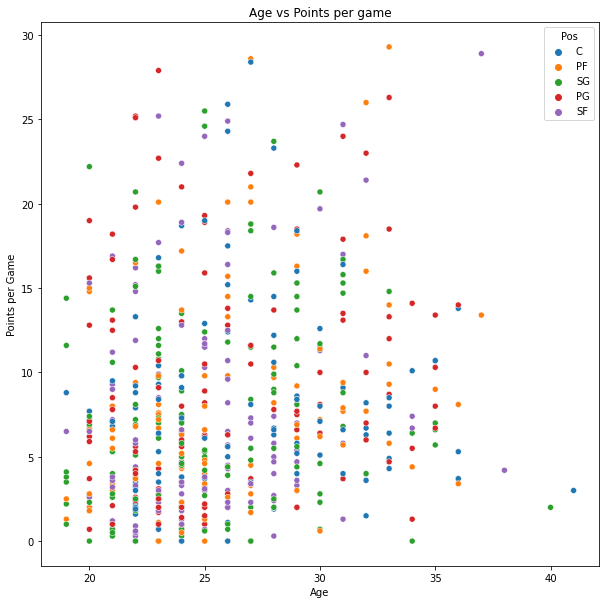

In [12]:
plt.figure(figsize=(10,10))
sns.scatterplot('Age','PTS',hue='Pos',data=NBA)
plt.xlabel('Age')
plt.ylabel('Points per Game')
plt.title('Age vs Points per game')

Usually there is a common trend that points per game will lower as the age increases. but there's an outlier where a player has an age over 35 and point per game close to 30. let's find out who is he.

<AxesSubplot:xlabel='Pos', ylabel='PTS'>

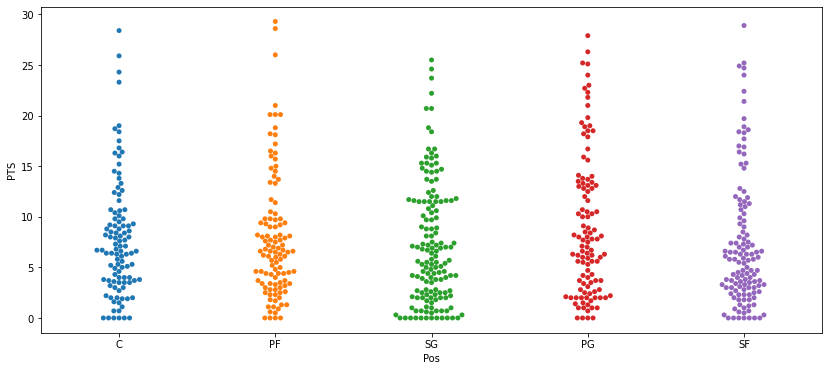

In [13]:
plt.figure(figsize=(14,6))
sns.swarmplot(x=NBA["Pos"],
              y=NBA["PTS"])

# drop columns

In [14]:
NBA.drop(columns=['Rk','Player'],axis=1,inplace=True)

In [15]:
type(NBA)

pandas.core.frame.DataFrame

In [16]:
NBA

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,C,22,TOR,34,20,25.3,3.4,8.1,0.412,0.3,...,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9
1,C,28,MEM,44,43,25.7,2.6,4.9,0.521,0.0,...,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7
2,C,24,MIA,21,21,32.9,6.9,13.3,0.518,0.0,...,0.767,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7
3,PF,21,MEM,25,0,10.5,1.4,3.8,0.372,0.2,...,0.579,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4
4,C,36,BRK,32,10,23.1,5.9,10.3,0.574,0.4,...,0.862,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,PF,33,SAS,24,0,13.9,2.7,4.8,0.560,0.0,...,0.450,1.4,2.0,3.4,2.3,0.8,0.3,1.1,1.4,5.8
586,PG,23,ATL,41,41,34.8,9.3,20.5,0.455,2.8,...,0.901,0.7,3.3,4.0,9.4,1.0,0.1,4.2,1.6,27.9
587,C,23,MIA,36,10,15.1,2.7,5.2,0.521,0.0,...,0.640,1.8,4.6,6.4,1.1,0.4,0.5,0.9,1.8,6.4
588,C,29,POR,27,0,13.1,1.9,3.3,0.567,0.0,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


In [17]:
duplicate = NBA[NBA.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


# data splitting 

In [18]:
X = NBA.drop('Pos', axis=1)
y = NBA['Pos']


In [19]:
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    
discrete_features = X.dtypes == int

# Feature Selection

In [20]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

ORB     0.227335
FG%     0.150763
TRB     0.147000
BLK     0.118684
3P      0.100900
DRB     0.089731
3PA     0.072367
STL     0.069619
PF      0.062948
AST     0.058651
3P%     0.045429
2P%     0.038315
eFG%    0.037382
2PA     0.031679
FT      0.029790
2P      0.021663
MP      0.017989
FTA     0.015380
TOV     0.000000
Age     0.000000
FT%     0.000000
Tm      0.000000
FGA     0.000000
FG      0.000000
GS      0.000000
G       0.000000
PTS     0.000000
Name: MI Scores, dtype: float64

In [21]:
def drop_uninformative(NBA, mi_scores):
    return NBA.loc[:, mi_scores > 0.05]

X= drop_uninformative(X, mi_scores)

# Clustering

In [22]:
kmeans = KMeans(n_clusters=5)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

In [23]:
X

,FG%,3P,3PA,ORB,DRB,TRB,AST,STL,BLK,PF,Cluster
0,0.412,0.3,1.3,2.4,5.3,7.7,1.3,0.6,0.6,2.2,3
1,0.521,0.0,0.0,4.3,4.9,9.3,3.0,1.0,0.6,1.7,3
2,0.518,0.0,0.0,2.6,7.3,10.0,3.2,1.2,0.5,3.1,3
3,0.372,0.2,1.5,0.9,1.6,2.5,0.5,0.1,0.2,0.9,1
4,0.574,0.4,1.1,1.5,4.1,5.7,0.9,0.4,1.1,1.7,4
...,...,...,...,...,...,...,...,...,...,...,...
585,0.560,0.0,0.1,1.4,2.0,3.4,2.3,0.8,0.3,1.4,4
586,0.455,2.8,7.5,0.7,3.3,4.0,9.4,1.0,0.1,1.6,0
587,0.521,0.0,0.2,1.8,4.6,6.4,1.1,0.4,0.5,1.8,4
588,0.567,0.0,0.1,1.9,2.8,4.6,0.8,0.3,0.2,2.1,4


# LogisticRegression

In [24]:
model= LogisticRegression(random_state=0).fit(X,y)
predict = cross_val_predict(estimator = model, X = X, y =y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           C       0.67      0.66      0.67       104
          PF       0.42      0.35      0.38       109
          PG       0.70      0.66      0.68       110
          SF       0.36      0.32      0.34       122
          SG       0.51      0.64      0.57       145

    accuracy                           0.53       590
   macro avg       0.53      0.53      0.53       590
weighted avg       0.52      0.53      0.52       590



 #  DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier as dtc

decision_tree = dtc(random_state=0)
decision_tree.fit(X,y)

predict = cross_val_predict(estimator = decision_tree, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           C       0.51      0.49      0.50       104
          PF       0.30      0.32      0.31       109
          PG       0.52      0.48      0.50       110
          SF       0.33      0.34      0.34       122
          SG       0.46      0.46      0.46       145

    accuracy                           0.42       590
   macro avg       0.42      0.42      0.42       590
weighted avg       0.42      0.42      0.42       590



# RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 0)
random_forest.fit(X, y)
predict= cross_val_predict(estimator = random_forest, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           C       0.62      0.58      0.60       104
          PF       0.31      0.28      0.30       109
          PG       0.67      0.70      0.68       110
          SF       0.31      0.28      0.29       122
          SG       0.47      0.54      0.50       145

    accuracy                           0.48       590
   macro avg       0.48      0.48      0.48       590
weighted avg       0.47      0.48      0.47       590



# KNeighborsClassifier


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X,y)
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           C       0.53      0.63      0.58       104
          PF       0.39      0.39      0.39       109
          PG       0.59      0.66      0.63       110
          SF       0.31      0.30      0.30       122
          SG       0.48      0.39      0.43       145

    accuracy                           0.47       590
   macro avg       0.46      0.48      0.47       590
weighted avg       0.46      0.47      0.46       590



# SVC

In [28]:
from sklearn.svm import SVC

scv = SVC(gamma='auto')
scv.fit(X,y)
predict= cross_val_predict(estimator = scv, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           C       0.68      0.62      0.65       104
          PF       0.42      0.33      0.37       109
          PG       0.69      0.61      0.65       110
          SF       0.33      0.27      0.30       122
          SG       0.44      0.64      0.52       145

    accuracy                           0.50       590
   macro avg       0.51      0.49      0.50       590
weighted avg       0.50      0.50      0.49       590



# GaussianNB

In [29]:
gnb = GaussianNB()
gnb.fit(X,y)
predict = cross_val_predict(estimator = gnb, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           C       0.71      0.53      0.60       104
          PF       0.38      0.31      0.34       109
          PG       0.56      0.34      0.42       110
          SF       0.26      0.19      0.22       122
          SG       0.36      0.66      0.46       145

    accuracy                           0.42       590
   macro avg       0.45      0.41      0.41       590
weighted avg       0.44      0.42      0.41       590



# AdaBoostClassifier

In [30]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
predict = cross_val_predict(estimator = clf, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           C       0.59      0.70      0.64       104
          PF       0.33      0.20      0.25       109
          PG       0.54      0.54      0.54       110
          SF       0.31      0.33      0.32       122
          SG       0.43      0.47      0.45       145

    accuracy                           0.44       590
   macro avg       0.44      0.45      0.44       590
weighted avg       0.43      0.44      0.43       590



# QuadraticDiscriminantAnalysis

In [31]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qd = QuadraticDiscriminantAnalysis()
qd.fit(X,y)
predict= cross_val_predict(estimator = qd, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           C       0.72      0.59      0.65       104
          PF       0.39      0.28      0.33       109
          PG       0.65      0.52      0.58       110
          SF       0.32      0.36      0.34       122
          SG       0.41      0.57      0.48       145

    accuracy                           0.47       590
   macro avg       0.50      0.46      0.47       590
weighted avg       0.49      0.47      0.47       590



# MLPClassifier

In [32]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X, y)
predict = cross_val_predict(estimator = mlp, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))


Classification Report: 
               precision    recall  f1-score   support

           C       0.68      0.64      0.66       104
          PF       0.39      0.34      0.36       109
          PG       0.68      0.70      0.69       110
          SF       0.33      0.33      0.33       122
          SG       0.50      0.56      0.53       145

    accuracy                           0.51       590
   macro avg       0.51      0.51      0.51       590
weighted avg       0.51      0.51      0.51       590



# BEST MODEL

In [35]:
from sklearn.tree import DecisionTreeClassifier as dtc

decision_tree = dtc(random_state=0)
decision_tree.fit(X,y)

predict = cross_val_predict(estimator = decision_tree, X = X, y = y, cv = 10)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           C       0.51      0.49      0.50       104
          PF       0.30      0.32      0.31       109
          PG       0.52      0.48      0.50       110
          SF       0.33      0.34      0.34       122
          SG       0.46      0.46      0.46       145

    accuracy                           0.42       590
   macro avg       0.42      0.42      0.42       590
weighted avg       0.42      0.42      0.42       590

